[ 5 13 14 20 27 28]


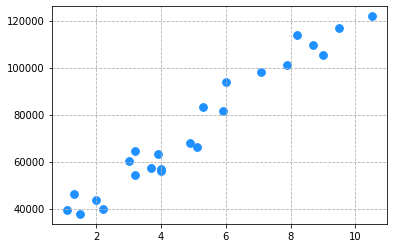

In [1]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm
import sklearn.pipeline as pl

import matplotlib.pyplot as plt
import cv2 as cv
import pickle



data = pd.read_csv("Salary_Data.csv",header=0)

test_index = np.random.choice(a=data.shape[0], size=int(data.shape[0]*0.2), replace=False, p=None)
test_index=np.sort(test_index)
print(test_index)



test_x,test_y = data.loc[test_index,data.columns[0]],data.loc[test_index,data.columns[1]]




def extract(l,test):
    mask = []
    for i in l:
        if i not in test:
            mask.append(True)
        else:
            mask.append(False)
    
    return mask
                
            
            
mask = extract(np.arange(data.shape[0]),test_index)


train_x,train_y = data.loc[mask,data.columns[0]],data.loc[mask,data.columns[1]]



plt.grid(linestyle="--")
plt.scatter(train_x,train_y,s=60,color="dodgerblue",label="Samples")







In [2]:
train_x=pd.DataFrame(train_x)
test_x=pd.DataFrame(test_x)



model = pl.make_pipeline(sp.PolynomialFeatures(5),lm.Ridge())
model.fit(train_x,train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('ridge', Ridge())])

In [3]:
pred_test_y=model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))

0.9697203839997856


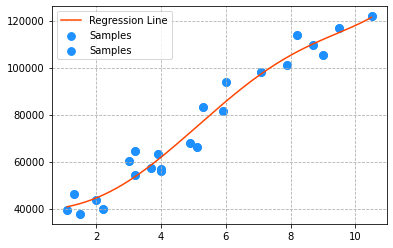

In [4]:
plt.grid(linestyle="--")
plt.scatter(train_x,train_y,s=60,color="dodgerblue",label="Samples")



pltx=np.linspace(train_x.min(),train_x.max(),200)
# pltx=pd.DataFrame(pltx)
plty=model.predict(pltx.reshape(-1,1)) #自适应转换为1列的二维数据


plt.grid(linestyle="--")
plt.scatter(train_x,train_y,s=60,color="dodgerblue",label="Samples")
plt.plot(pltx,plty,color="orangered",label="Regression Line")
plt.legend()
plt.show()
